<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [2]:
!pip install pandas

In [1]:
!pip install matplotlib
!pip install seaborn


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-22 19:46:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  28.6MB/s    in 17s     

2025-11-22 19:46:41 (8.75 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [8]:
df = pd.read_csv("survey-data.csv")
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

### Display the first few rows of the data to understand its structure


In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1200x600 with 0 Axes>

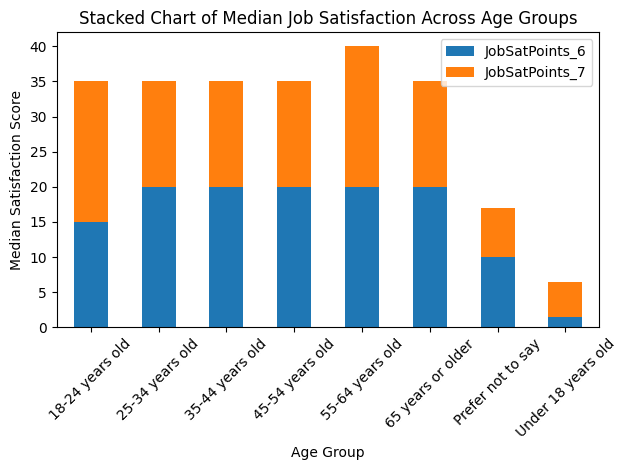

In [9]:
# Load data
df = pd.read_csv("survey-data.csv")

# Convert satisfaction columns to numeric (safe)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# ---------------------------
# 1. STACKED CHART BY AGE GROUP
# ---------------------------

# Group by Age and compute median values
age_grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Plot
plt.figure(figsize=(12,6))
age_grouped.plot(kind='bar', stacked=True)
plt.title("Stacked Chart of Median Job Satisfaction Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Satisfaction Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_664/973180753.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

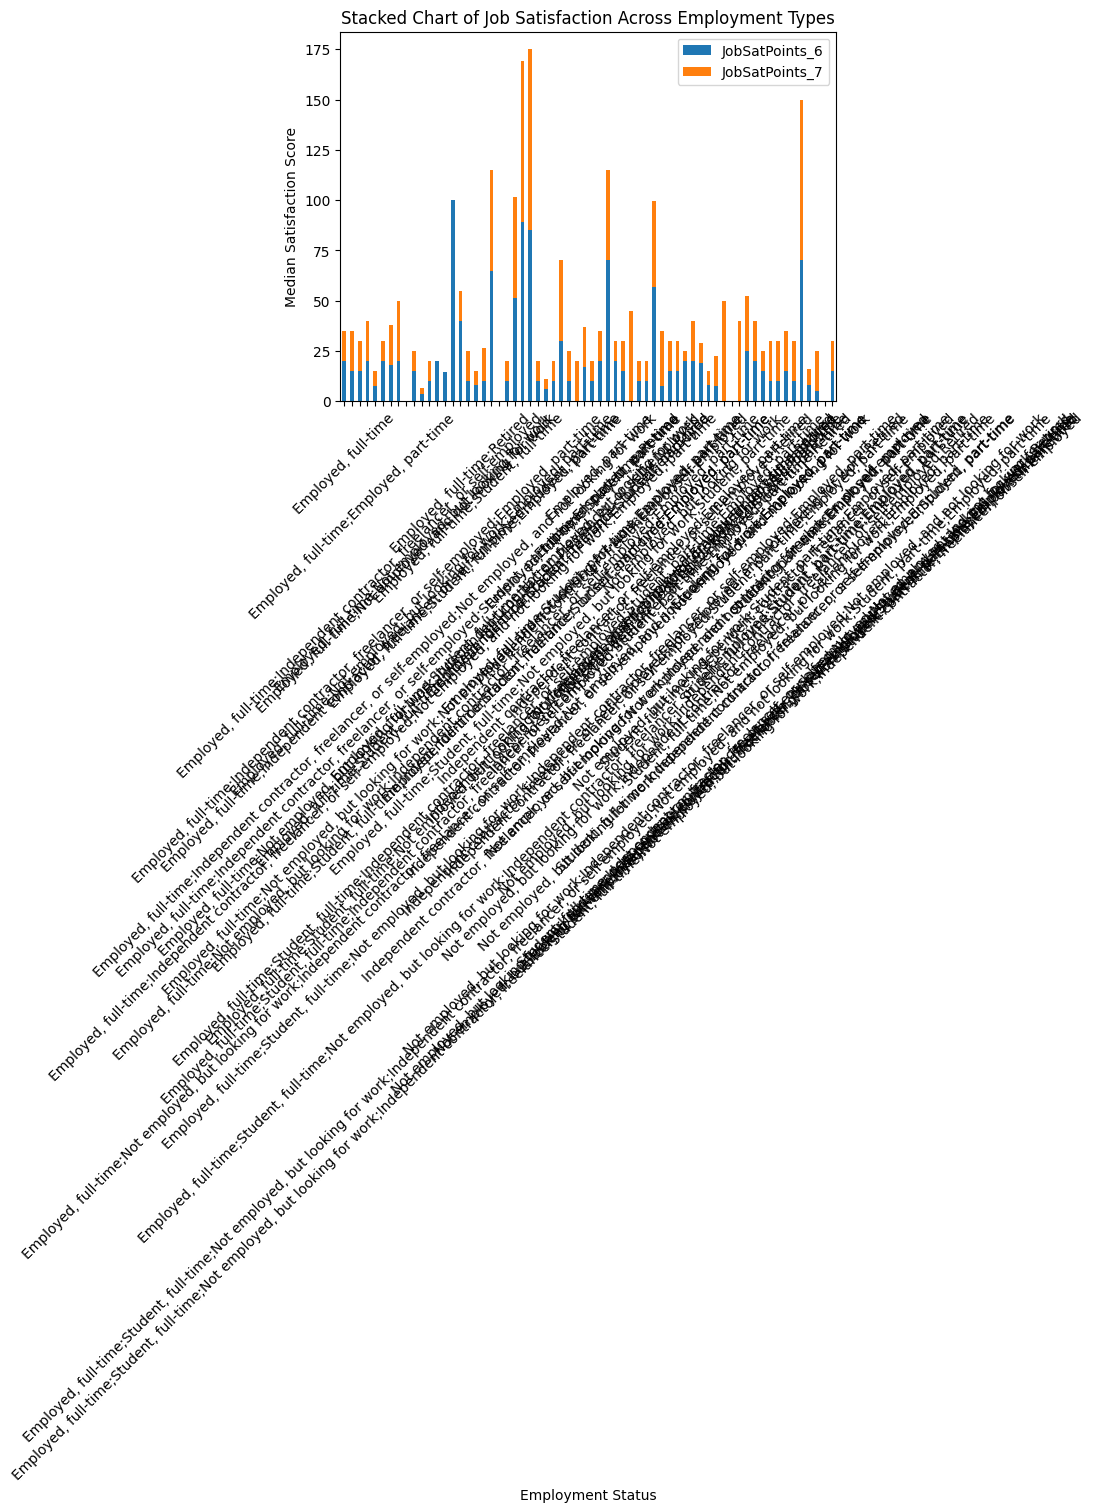

In [10]:
# ---------------------------
# 2. STACKED CHART BY EMPLOYMENT STATUS
# ---------------------------

emp_grouped = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

plt.figure(figsize=(12,6))
emp_grouped.plot(kind='bar', stacked=True)
plt.title("Stacked Chart of Job Satisfaction Across Employment Types")
plt.xlabel("Employment Status")
plt.ylabel("Median Satisfaction Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


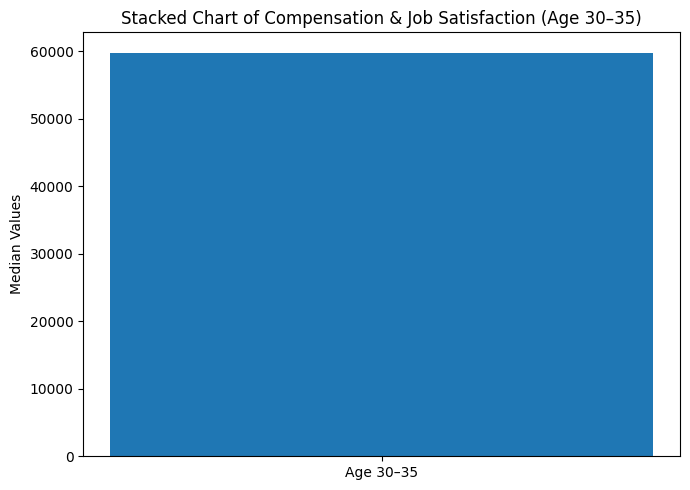

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Filter for respondents aged 30–35 (fits inside the 25–34 age group)
df_age_30_35 = df[df['Age'] == '25-34 years old']

# Aggregate median values
data_30_35 = df_age_30_35[['ConvertedCompYearly','JobSatPoints_6']].median()

# Stacked bar chart
plt.figure(figsize=(7,5))
plt.bar('Age 30–35', data_30_35['ConvertedCompYearly'])
plt.bar('Age 30–35', data_30_35['JobSatPoints_6'], 
        bottom=data_30_35['ConvertedCompYearly'])

plt.title("Stacked Chart of Compensation & Job Satisfaction (Age 30–35)")
plt.ylabel("Median Values")
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


<Figure size 1200x600 with 0 Axes>

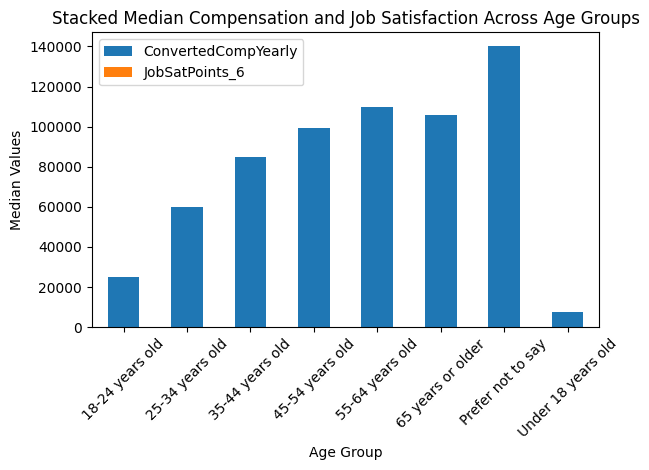

In [12]:
# Convert Age to categories directly (your dataset already has age groups)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

age_grouped = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna()

plt.figure(figsize=(12,6))
age_grouped.plot(kind='bar', stacked=True)
plt.title("Stacked Median Compensation and Job Satisfaction Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


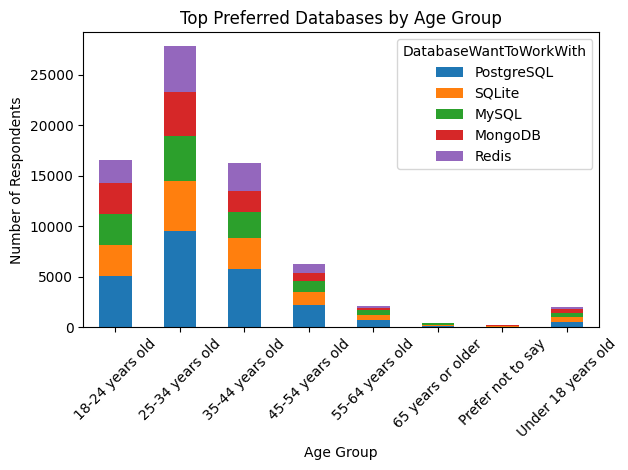

In [16]:
# Split multi-value column into lists
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].fillna('')
df_expanded = df.assign(
    DatabaseWantToWorkWith = df['DatabaseWantToWorkWith'].str.split(';')
).explode('DatabaseWantToWorkWith')

# Remove blanks
df_expanded = df_expanded[df_expanded['DatabaseWantToWorkWith'] != '']

# Count database preference by age
db_age_counts = df_expanded.groupby(['Age','DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Limit to top 5 most popular databases
top_5_databases = db_age_counts.sum().sort_values(ascending=False).head(5).index
db_age_counts_top5 = db_age_counts[top_5_databases]

# Plot stacked chart

db_age_counts_top5.plot(kind='bar', stacked=True)
plt.title("Top Preferred Databases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_664/838215909.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


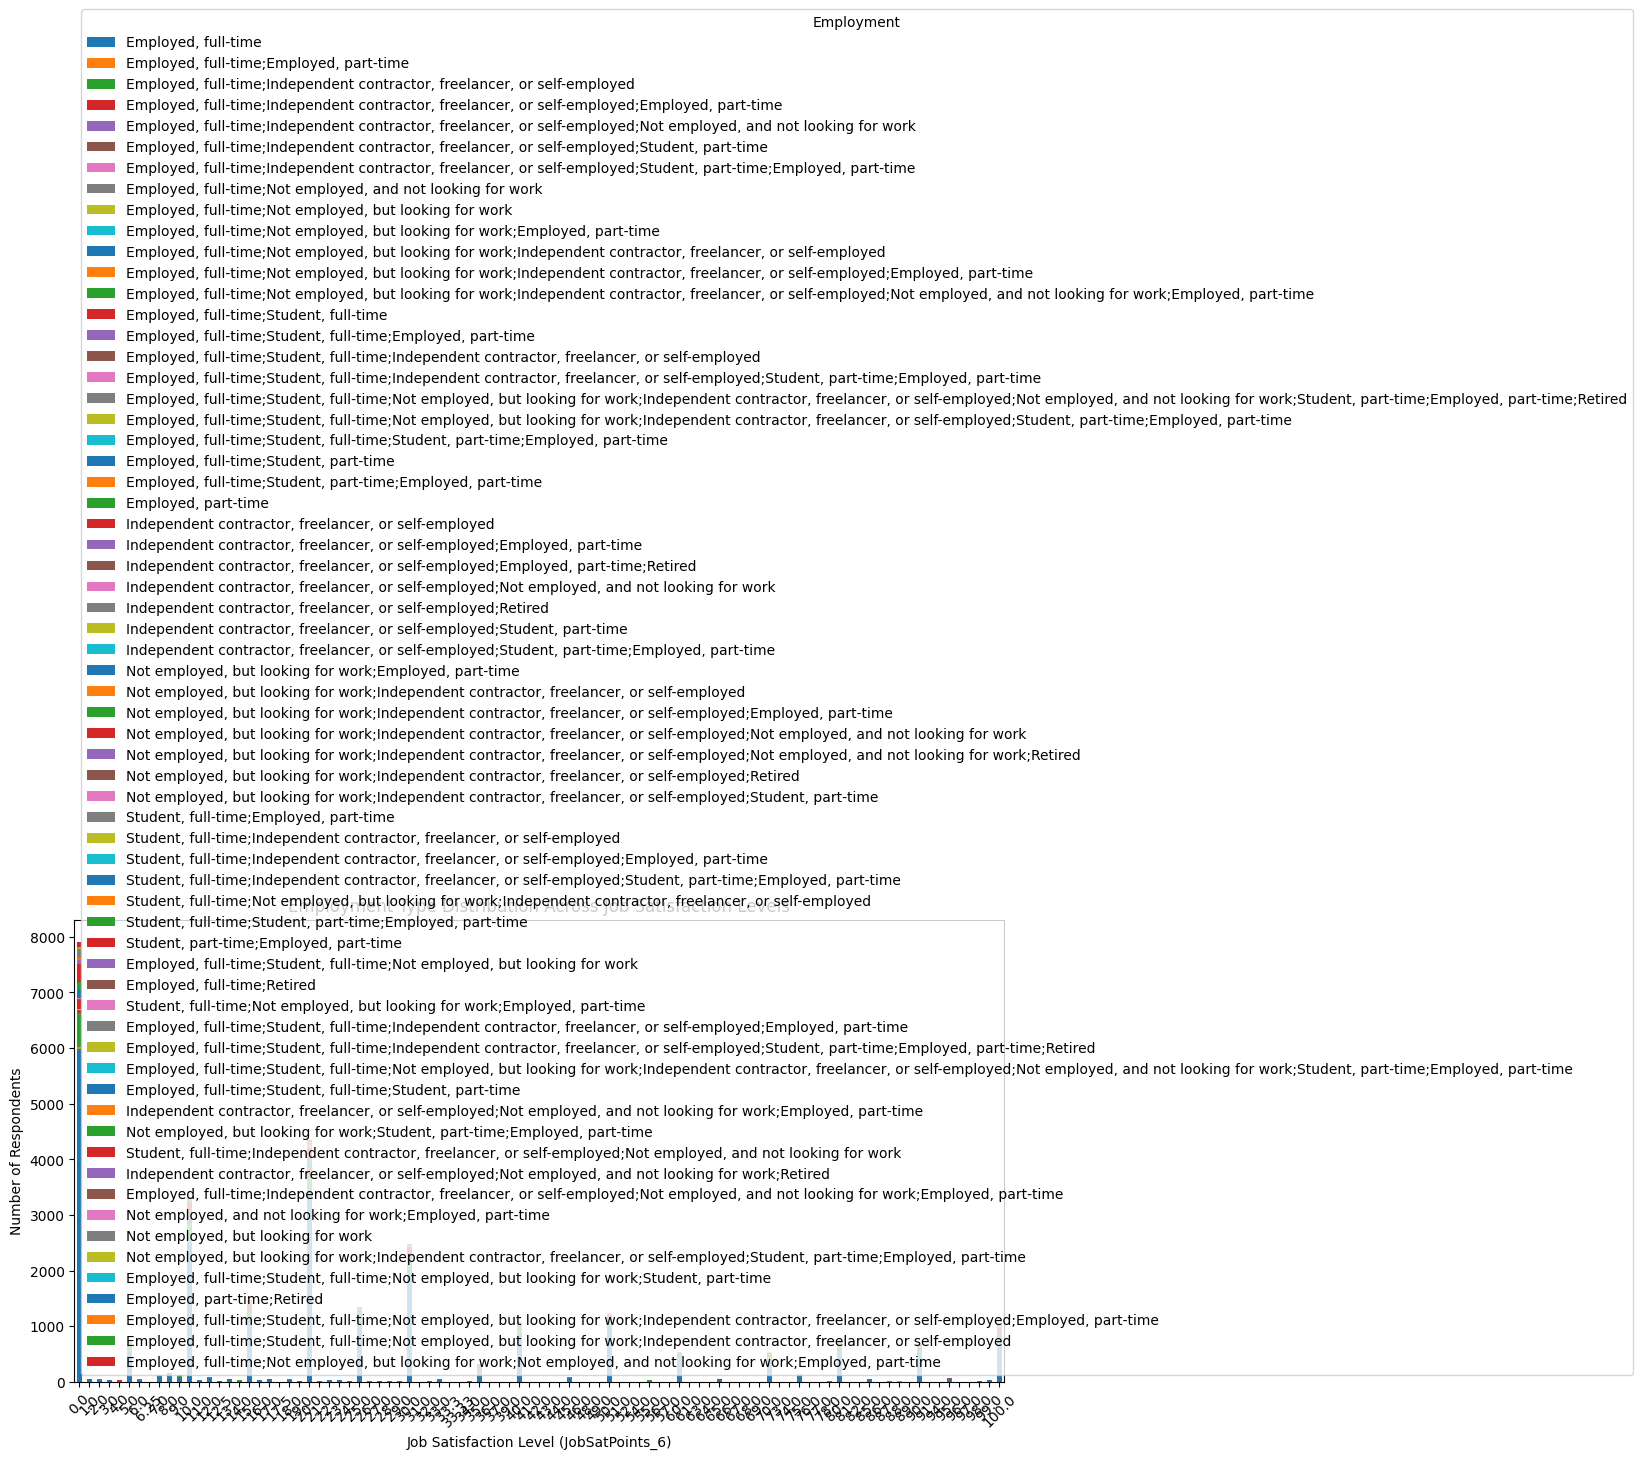

In [19]:
# Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Count employment types per job satisfaction level
emp_sat_counts = df.groupby(['JobSatPoints_6','Employment']).size().unstack(fill_value=0)

# Stacked bar chart (no plt.figure() here)
ax = emp_sat_counts.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Employment Type Distribution Across Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level (JobSatPoints_6)")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


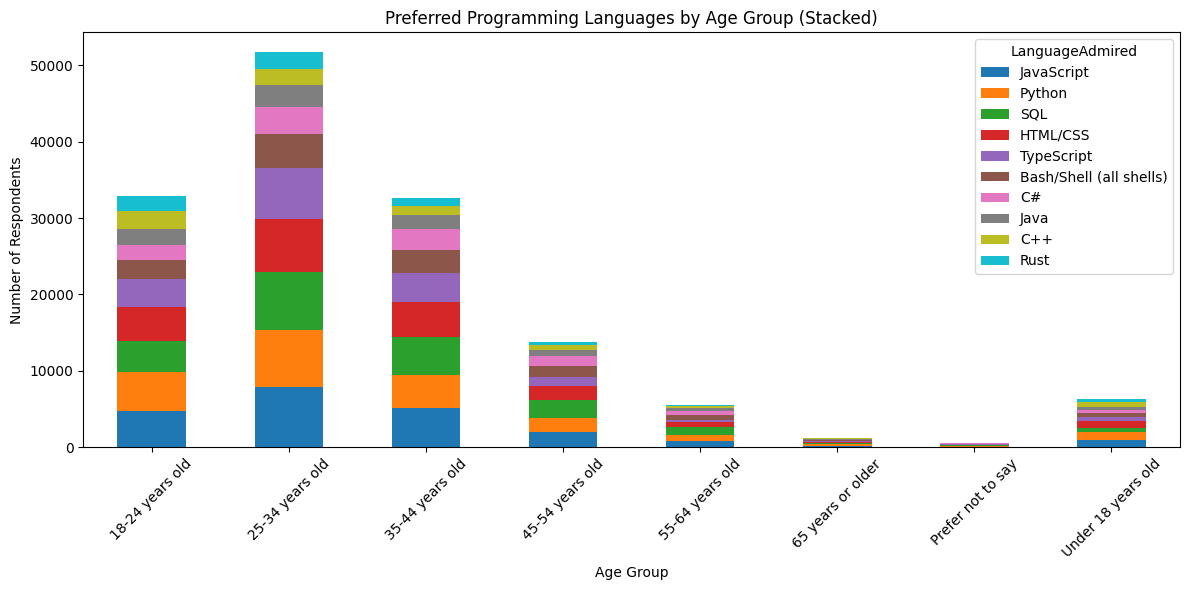

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean and split multi-select column
df['LanguageAdmired'] = df['LanguageAdmired'].fillna('')
df_lang = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')
df_lang = df_lang[df_lang['LanguageAdmired'] != '']

# Count languages by age group
lang_age_counts = df_lang.groupby(['Age','LanguageAdmired']).size().unstack(fill_value=0)

# Select top 10 admired languages overall
top_languages = lang_age_counts.sum().sort_values(ascending=False).head(10).index
lang_age_counts_top = lang_age_counts[top_languages]

# Stacked chart
ax = lang_age_counts_top.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Preferred Programming Languages by Age Group (Stacked)")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_664/3787059654.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


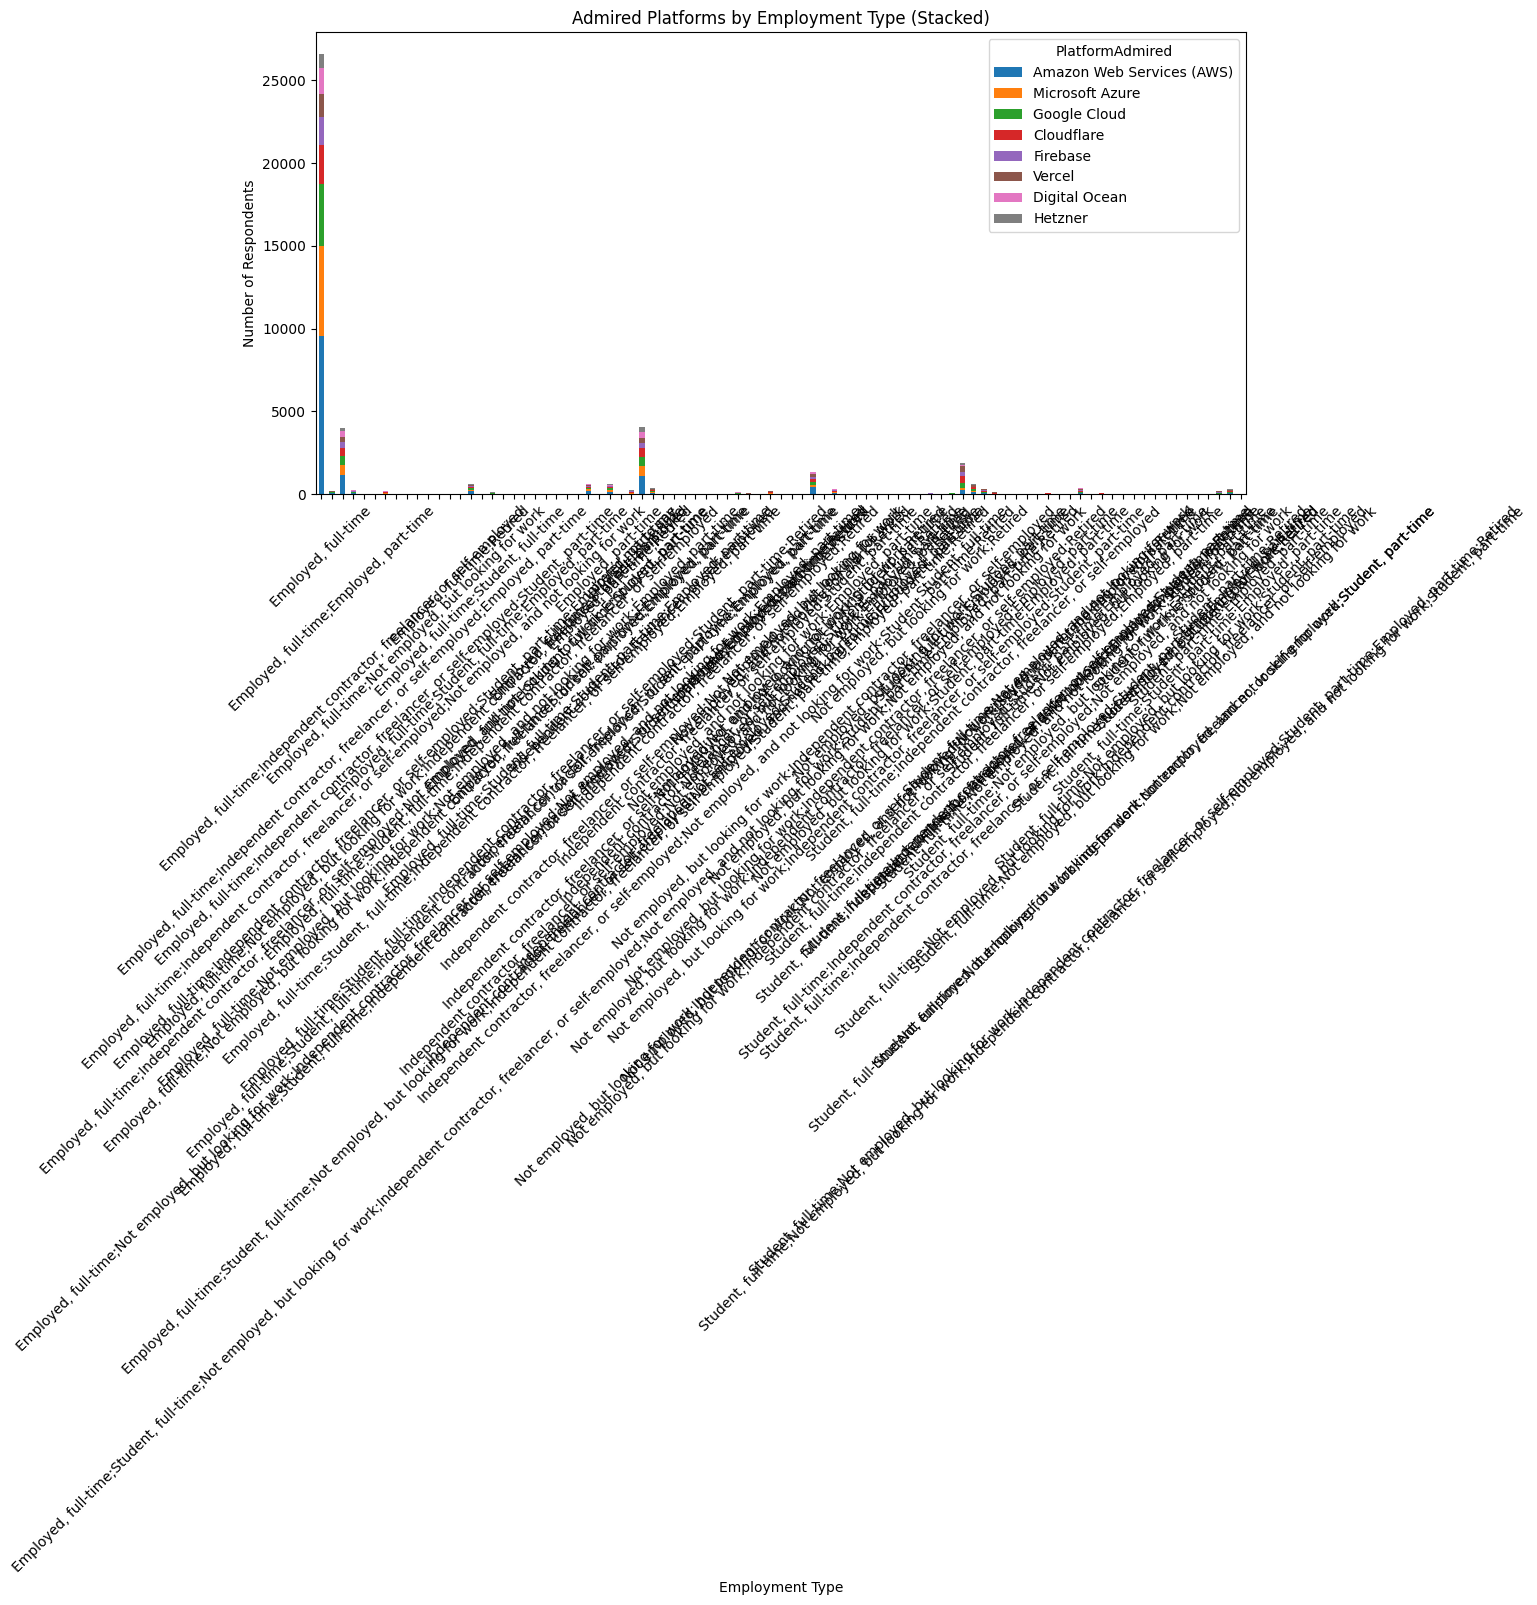

In [21]:
# Clean and expand multi-select platform column
df['PlatformAdmired'] = df['PlatformAdmired'].fillna('')
df_plat = df.assign(PlatformAdmired=df['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')
df_plat = df_plat[df_plat['PlatformAdmired'] != '']

# Count admired platforms by employment type
plat_emp_counts = df_plat.groupby(['Employment','PlatformAdmired']).size().unstack(fill_value=0)

# Select top 8 admired platforms overall to avoid clutter
top_platforms = plat_emp_counts.sum().sort_values(ascending=False).head(8).index
plat_emp_counts_top = plat_emp_counts[top_platforms]

# Stacked bar chart
ax = plat_emp_counts_top.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Admired Platforms by Employment Type (Stacked)")
plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
